In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

%matplotlib inline

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_missing = df.copy()
df_missing.loc[5:10, 'sepal length (cm)'] = np.nan
df_missing.loc[20:25, 'species'] = np.nan

df_missing.head(15)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,NaN,3.9,1.7,0.4,0.0
6,NaN,3.4,1.4,0.3,0.0
7,NaN,3.4,1.5,0.2,0.0
8,NaN,2.9,1.4,0.2,0.0
9,NaN,3.1,1.5,0.1,0.0


In [4]:
num_imputer = SimpleImputer(strategy='mean')
df_missing['sepal length (cm)'] = num_imputer.fit_transform(df_missing[['sepal length (cm)']])


In [5]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df_missing['species'] = cat_imputer.fit_transform(df_missing[['species']])


In [6]:
label_encoder = LabelEncoder()
df_missing['species'] = label_encoder.fit_transform(df_missing['species'])

df_missing.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_missing.iloc[:, :-1]) 

df_scaled = pd.DataFrame(scaled_features, columns=iris.feature_names)
df_scaled['species'] = df_missing['species']

df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.973943,1.019004,-1.340227,-1.315444,0
1,-1.223494,-0.131979,-1.340227,-1.315444,0
2,-1.473046,0.328414,-1.397064,-1.315444,0
3,-1.597821,0.098217,-1.283389,-1.315444,0
4,-1.098719,1.249201,-1.340227,-1.315444,0


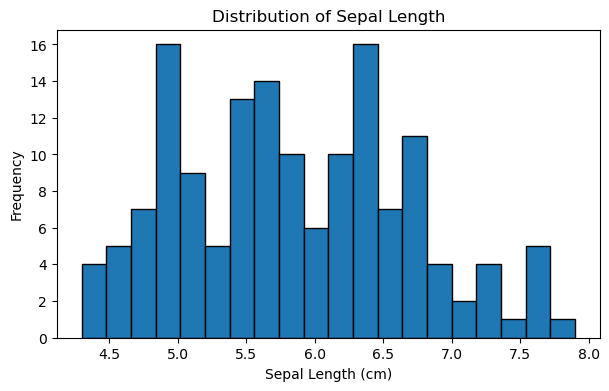

In [8]:
plt.figure(figsize=(7,4))
plt.hist(df['sepal length (cm)'], bins=20, edgecolor='black')
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()


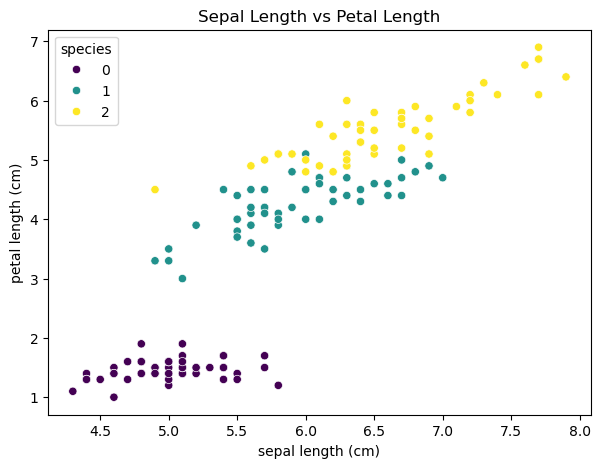

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['sepal length (cm)'],
    y=df['petal length (cm)'],
    hue=df['species'],
    palette='viridis'
)
plt.title("Sepal Length vs Petal Length")
plt.show()


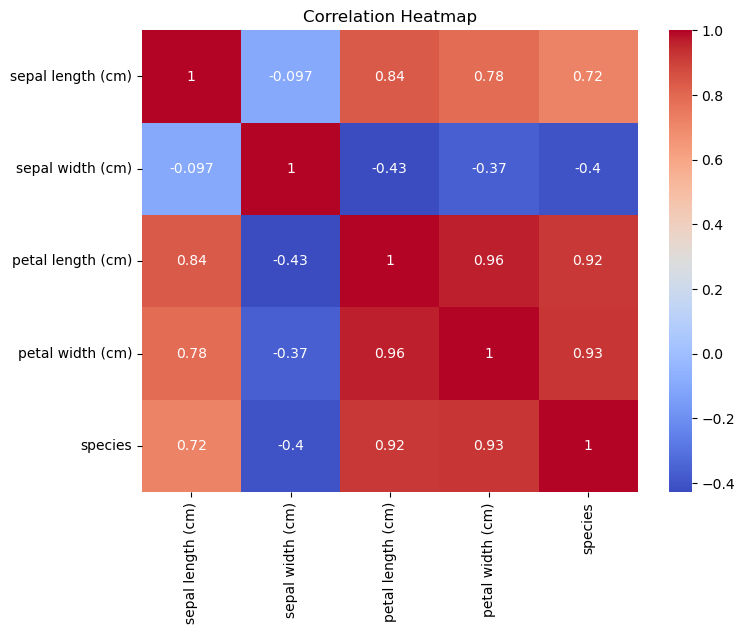

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df_missing.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
